In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'inches')

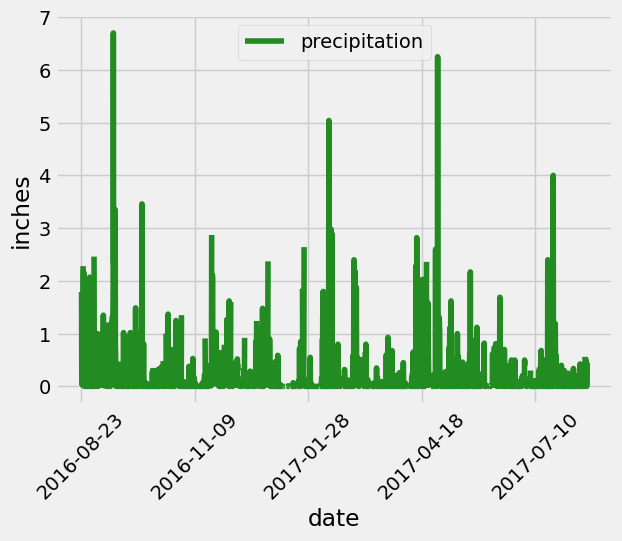

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Calculate the date one year from the last date in data set.
one_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= precipitation).all()

# Perform a query to retrieve the data and precipitation scores
query = pd.DataFrame(one_year, columns = ["date", "precipitation"])
query = query.sort_values("date")

# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe = pd.DataFrame(query, columns = ["date", "precipitation"])

# Sort the dataframe by date
dataframe.set_index("date", inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
query.plot(x = "date", y = "precipitation", color = "forestgreen")
plt.xticks(rotation = 45)
plt.ylabel("inches")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(measurement.station).distinct().count()
print(f"Number of Stations: {station_number}")

Number of Stations: 9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations = session.query(func.min(measurement.tobs),
                               func.max(measurement.tobs),
                               func.avg(measurement.tobs)).\
filter(measurement.station == "USC00519281").order_by(func.min(measurement.tobs)).all()
active_stations

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot: ylabel='Frequency'>

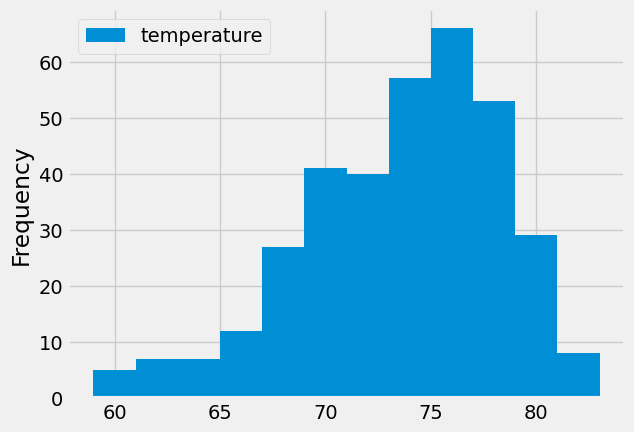

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= precipitation)
plot = pd.DataFrame(histogram, columns = ["temperature"])
plot.plot.hist(bins = 12)

# Close session

In [17]:
# Close Session
session.close()